# Recurrent Neural Network



# Part 1 = Data Preprocessing

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,01-03-2012,325.25,332.83,324.97,663.59,"73,80,500"
1,01-04-2012,331.27,333.87,329.08,666.45,"57,49,400"
2,01-05-2012,329.83,330.75,326.89,657.21,"65,90,300"
3,01-06-2012,328.34,328.77,323.68,648.24,"54,05,900"
4,01-09-2012,322.04,322.29,309.46,620.76,"1,16,88,800"


In [3]:
training_set = dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

# Feature Scalling

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [5]:
training_set.shape

(1258, 1)

# Ceating a data structure with 60 timesteps and 1 output

In [6]:
x_train = []
y_train = []
for i in range(60, 1258):
    x_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping

In [7]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# part 2 - Building and Training the RNN

Importing the keras libraries and packages

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN

In [9]:
regressor = Sequential()

# Adding the first LSTM layer and Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True,))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation¶

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True,))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation¶

In [13]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer

In [14]:
regressor.add(Dense(units = 1))

# Compiling the RNN

In [15]:
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')

# Fitting the RNN to Training set

In [16]:
regressor.fit(x_train, y_train, epochs = 100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 10s 66ms/step - loss: 0.0427
Epoch 2/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0061
Epoch 3/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0050
Epoch 5/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0049
Epoch 6/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0045
Epoch 7/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0052
Epoch 8/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0053
Epoch 10/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 3s 66ms/step - loss: 0.0044
Epoch 13/100
38/38 [====

In [17]:
pred=regressor.predict(x_train)

38/38 [==============================] - 3s 24ms/step


# Evaluating the RNN

In [18]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_train, pred))
rmse

0.021331424906501147

# part - 3 Making the predictions and visualising the results

Getting the real stock price of 2017

In [19]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017

In [20]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']),axis=0)
input = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
input = input.reshape(-1,1)
input = sc.transform(input)
x_test = []
for i in range(60, 80):
    x_test.append(input[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 52ms/step


# Visualising the results

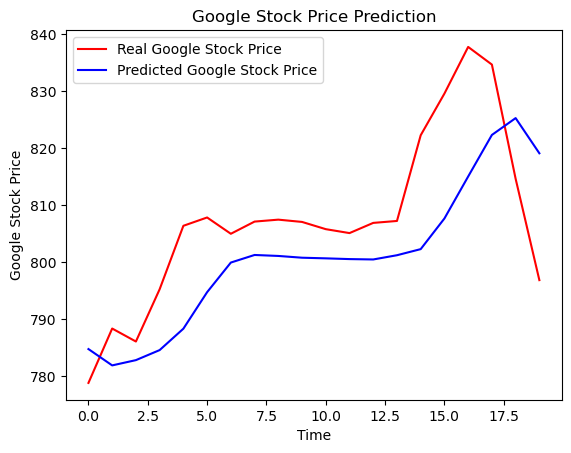

In [21]:
plt.plot(real_stock_price, color = 'red' , label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()